# PassManager Fidelity
In this exercise I will be checking how the use of the PassManager is affected by the use of the approximation_degree parameter. Both in the complexity of the circuit which is being generated in the transpilation process and in the fidelity obtained with each option.

First I will be creating an instance of the backend service.

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager

service = QiskitRuntimeService()
backend = service.backend('ibm_torino')

management.get:WARNING:2025-12-14 17:49:33,595: Loading default saved account


Then I create a simple circuit for this exercise.

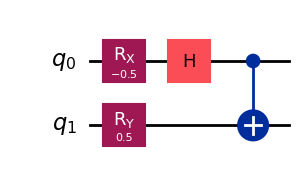

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.rx(-0.5,0)
qc.ry(0.5,1)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

Now I create two different PassManagers using different aproximation_degree values.

In [3]:
pm1 = generate_preset_pass_manager(backend=backend,optimization_level=3,approximation_degree=1)
pm2 = generate_preset_pass_manager(backend=backend,optimization_level=3,approximation_degree=0.85)

I generate the first transpiled circuit.

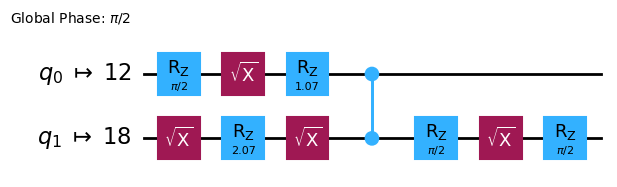

In [4]:
qct1 = pm1.run(qc)
qct1.draw('mpl')

And also the second one (with aproximation_degree=0.85). In this case the circuit is slightly smaller: nine 1q gates instead of ten.

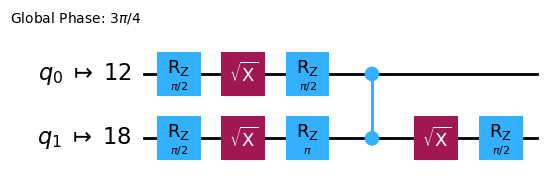

In [5]:
qct2 = pm2.run(qc)
qct2.draw('mpl')

I 'reduce' the number of bits from the backend by importing the transpiled circuit. Otherwise we cannot create an Operator.

In [6]:
qcx1 = QuantumCircuit.from_instructions(qct1)
qcx2 = QuantumCircuit.from_instructions(qct2)

I create Operators and measure process_fidelity between the initial circuit and the transpiled one.

In [7]:
from qiskit.quantum_info import Operator, process_fidelity

op = Operator.from_circuit(qc)
op1 = Operator.from_circuit(qcx1)

process_fidelity(op,op1)

1.0

I also measure the process fidelity when using a approximation_degree. The fidelity is slightly smaller as expected.

In [8]:
op2 = Operator.from_circuit(qcx2)

process_fidelity(op,op2)

0.8813290691787035

Just for completeness, I also check the statevector fidelity.

In [9]:
from qiskit.quantum_info import Statevector,state_fidelity

sv = Statevector.from_instruction(qc)
sv1 = Statevector.from_instruction(qcx1)

state_fidelity(sv,sv1)

0.9999999999999998

In [10]:
sv2 = Statevector.from_instruction(qcx2)

state_fidelity(sv,sv2)

0.8813290691787035